In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
def listToTable(lis):
    table = []
    a = np.asarray(lis)
    for j in range(0, len(lis)):
        a1 = a[j][0:-2].split(' ')
        a2 = map(float, a1)
        a3 = np.asarray(a2)
        table.append(a3)
    table = np.asarray(table)
    return table

In [3]:
def getTableTable(files):
    f = open('data/'+files+'.txt', "r")
    a = f.readlines()
    del a[0]
    list_list = []
    start = []
    table_table = []
    for i in range(0, len(a)):
        if (len(a[i]) == 4):
            start.append(i)
    for i in range(0, len(start)):
        lis = []
        if i != len(start)-1:
            for j in range(1, start[i+1]-start[i]):
                lis.append(a[j+start[i]])
        else:
            for j in range(1, len(a)-start[i]):
                lis.append((a[j+start[i]]))
        list_list.append(lis)
    for i in range(0, len(list_list)):
        table = listToTable(list_list[i])
        table_table.append(table)
    return table_table

In [4]:
def getTableVar(table, var):
    if var == 'x':
        return table[:,0]
    elif var == 'y':
        return table[:,1]
    elif var == 't':
        return table[:,2]
    elif var == 'dx':
        return table[:,3]
    elif var == 'dy':
        return table[:,4]
    elif var == 'dt':
        return table[:,5]
    elif var == 'dr2':
        return table[:,6]
    elif var == 'totDisplacement2':
        return table[:,7]
    else:
        return False

In [5]:
def getNStep(files):
    f = open('data/'+files+'.txt', "r")
    a = f.readlines()
    del a[0]
    start = []
    nstep = []
    for i in range(0, len(a)):
        if (len(a[i]) == 4):
            start.append(i)
    for i in range(0, len(start)):
        if i != len(start)-1:
            nstep.append(start[i+1]-start[i])
        else:
            nstep.append(len(a)-start[i])
    return nstep

In [6]:
def getIndexLongStep(files):
    nstep = getNStep(files)
    zipped = zip(np.arange(len(nstep)), nstep)
    sort = sorted(zipped, key=lambda x: x[1], reverse=True)
    index = np.asarray(sort)[:,0]
    return index

In [7]:
def plt2d(files, left, right, bottom, top, double=False, select=False):
    table_table = getTableTable(files)
    fig = plt.figure(figsize=(6,6))
    for i in range(0,len(table_table)):
        if select == True:
            table = table_table[getIndexLongStep(files)[i]]
            if i == 10:
                break
        else:
            table = table_table[i]
        x = getTableVar(table,'x') * 1e6
        y = getTableVar(table,'y') * 1e6
        if double == True:
            x = x/2
            y = y/2
        plt.plot(x,y)
        plt.xlabel('x [$\mu m$]')
        plt.ylabel('y [$\mu m$]')
        plt.xlim(left=left, right=right)
        plt.ylim(bottom=bottom, top=top)
    plt.title('Particle Tracks')
    plt.savefig('images/'+files+'.pdf', bbox_inches='tight')

In [8]:
def getThD(eta, d):
    kB = 1.38e-23
    T = 293
    D = kB * T / (3 * np.pi * eta * d)
    return D

In [9]:
def getExD(dr2_array, tau, dimensions=2):
    D = np.mean(dr2_array)/(2*dimensions*tau)
    dD = max(dr2_array)/(2*dimensions*tau)
    return D, dD

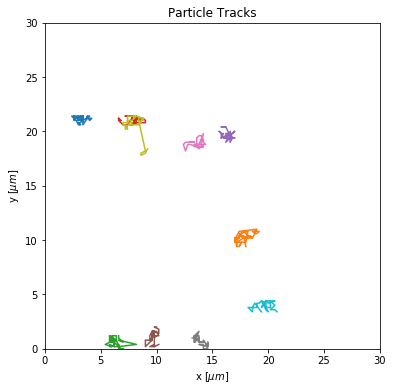

In [10]:
plt2d('1.6_pvp_small', 0, 30, 0, 30, select=True)

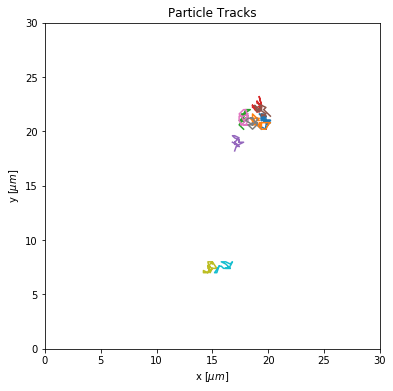

In [11]:
plt2d('2.5_pvp_small', 0, 30, 0, 30, select=True)

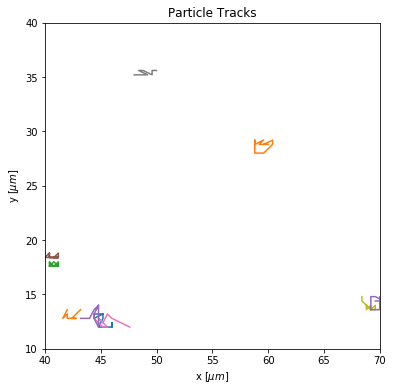

In [12]:
plt2d('4.6_pvp_small_n', 40, 70, 10, 40)

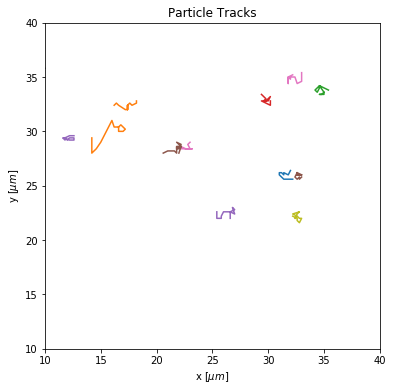

In [13]:
plt2d('1.6_gll_small', 10, 40, 10, 40)

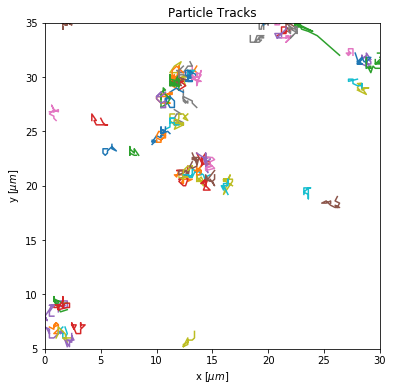

In [14]:
plt2d('2.5_gll_small', 0, 30, 5, 35)

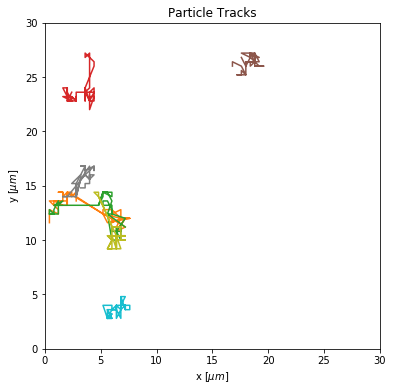

In [15]:
plt2d('4.6_gll_small', 0, 30, 0, 30, select=True)

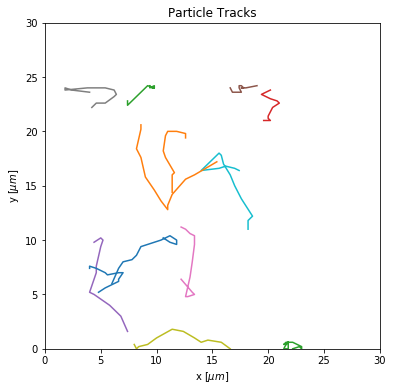

In [16]:
plt2d('1.6_pvp_big_x2', 0, 30, 0, 30, double=True)

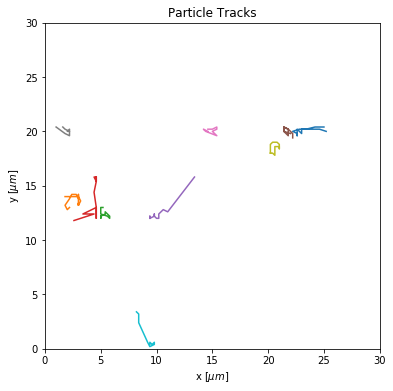

In [17]:
plt2d('2.5_pvp_big', 0, 30, 0, 30, select=True)

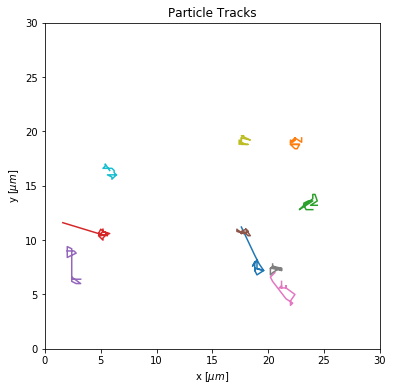

In [18]:
plt2d('4.6_pvp_big', 0, 30, 0, 30, select=True)

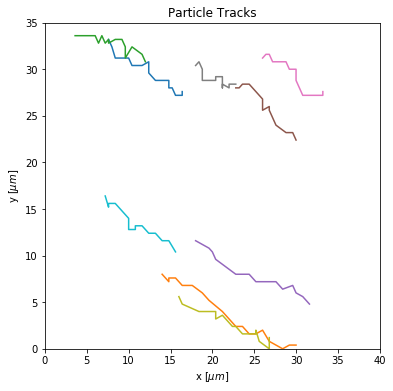

In [19]:
plt2d('onion_1', 0, 40, 0, 35, select=True)

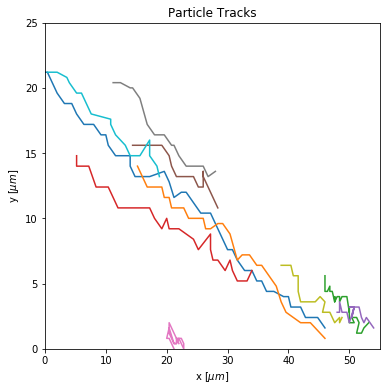

In [20]:
plt2d('onion_2', 0, 55, 0, 25, select=True)

In [23]:
def getMeanD(files, double=False):
    D_array = []
    dD_array = []
    table_table = getTableTable(files)
    for table in table_table:
        if double == True:
            dr2 = getTableVar(table, 'dr2')/4
        else:
            dr2 = getTableVar(table, 'dr2')
        tau_array = np.mean(getTableVar(table, 'dt')[1:])
        D, dD = getExD(dr2, np.mean(tau_array))
        D_array.append(D)
        dD_array.append(dD)
    return np.mean(D_array), np.mean(dD_array)

In [24]:
print getThD(1.66E-3, 0.4E-6)
print getMeanD('1.6_pvp_small'), getMeanD('1.6_pvp_small')[0]/getThD(1.66E-3, 0.4E-6)
print getMeanD('1.6_gll_small'), getMeanD('1.6_gll_small')[0]/getThD(1.66E-3, 0.4E-6)

6.4611154307e-13
(1.6852184318791913e-12, 9.883021297216162e-12) 2.608246904043446
(9.2575901517861e-13, 3.4876482021753923e-12) 1.4328160905155682


In [26]:
print getThD(2.50E-3, 0.4E-6)
print getMeanD('2.5_pvp_small'), getMeanD('2.5_pvp_small')[0]/getThD(2.50E-3, 0.4E-6)
print getMeanD('2.5_gll_small'), getMeanD('2.5_gll_small')[0]/getThD(2.50E-3, 0.4E-6)

4.29018064599e-13
(1.2168319077098123e-12, 4.423335052856966e-12) 2.836318579844784
(1.1086403597580635e-12, 4.559258420848305e-12) 2.5841344485005773


In [27]:
print getThD(4.65E-3, 0.4E-6)
print getMeanD('4.6_pvp_small_n'), getMeanD('4.6_pvp_small_n')[0]/getThD(4.65E-3, 0.4E-6)
print getMeanD('4.6_gll_small'), getMeanD('4.6_gll_small')[0]/getThD(4.65E-3, 0.4E-6)

2.3065487344e-13
(1.3850751674777466e-12, 6.2745522393571055e-12) 6.004968144918384
(4.683991705374278e-12, 2.9172879220249946e-11) 20.30736067057991


In [28]:
print getThD(1.66E-3, 0.96E-6)
print getMeanD('1.6_pvp_big_x2', double=True), getMeanD('1.6_pvp_big_x2', double=True)[0]/getThD(1.66E-3, 0.96E-6)

2.69213142946e-13
(3.3287778301991042e-12, 1.2032778833444222e-11) 12.364841455265092


In [29]:
print getThD(2.50E-3, 0.96E-6)
print getMeanD('2.5_pvp_big'), getMeanD('2.5_pvp_big')[0]/getThD(2.50E-3, 0.96E-6)

1.78757526916e-13
(1.4812843021240493e-12, 1.0683116916924489e-11) 8.286556251249378


In [30]:
print getThD(4.65E-3, 0.96E-6)
print getMeanD('4.6_pvp_big'), getMeanD('4.6_pvp_big')[0]/getThD(4.65E-3, 0.96E-6)

9.61061972667e-14
(1.3353281119625716e-12, 6.24165814422353e-12) 13.894297661753


In [55]:
def getDisplace(table):
    x = getTableVar(table, 'x')
    y = getTableVar(table, 'y')
    displace_x = x[-1]-x[0]
    displace_y = y[-1]-y[0]
    displace = np.array([displace_x, displace_y])
    return displace

In [56]:
def getAllDisplace(files):
    table_table = getTableTable(files)
    displace_array = []
    for table in table_table:
        displace = getDisplace(table)
        displace_array.append(displace)
    displace_array = np.asarray(displace_array)
    return displace_array

In [31]:
def getv(table):
    t = getTableVar(table, 't')
    x = getTableVar(table, 'x')
    y = getTableVar(table, 'y')
    vx = (x[-1]-x[0])/(t[-1]-t[0])
    vy = (y[-1]-y[0])/(t[-1]-t[0])
    v = np.array([vx, vy])
    return v

In [46]:
def getMeanv(files):
    table_table = getTableTable(files)
    v_array = []
    for table in table_table:
        v = getv(table)
        v_array.append(v)
        #print v
    v_array = np.asarray(v_array)
    return v_array
    #mean_vx = np.mean(v_array[:,0])
    #mean_vy = np.mean(v_array[:,1])
    #return mean_vx, mean_vy

(array([3., 1., 1., 2., 1., 2., 2., 0., 2., 3., 0., 0., 1., 3., 3., 1., 0.,
        0., 0., 0., 2., 1., 0., 2., 1., 4., 3., 4., 4., 3., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1.]),
 array([-6.21469485, -5.90670427, -5.5987137 , -5.29072312, -4.98273255,
        -4.67474198, -4.3667514 , -4.05876083, -3.75077026, -3.44277968,
        -3.13478911, -2.82679853, -2.51880796, -2.21081739, -1.90282681,
        -1.59483624, -1.28684567, -0.97885509, -0.67086452, -0.36287395,
        -0.05488337,  0.2531072 ,  0.56109778,  0.86908835,  1.17707892,
         1.4850695 ,  1.79306007,  2.10105064,  2.40904122,  2.71703179,
         3.02502237,  3.33301294,  3.64100351,  3.94899409,  4.25698466,
         4.56497523,  4.87296581,  5.18095638,  5.48894696,  5.79693753,
         6.1049281 ]),
 <a list of 40 Patch objects>)

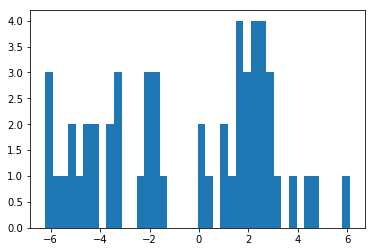

In [53]:
v_array = getMeanv('onion_1')
plt.hist(v_array[:,0]*1e6, bins=40)

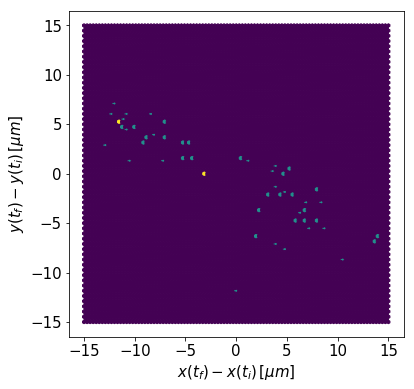

In [73]:
displace_array = getAllDisplace('onion_1')
fig = plt.figure(figsize=(6,6))
plt.hexbin(displace_array[:,0]*1e6, displace_array[:,1]*1e6, extent=(-15, 15, -15, 15))
plt.xlabel('$x(t_f)-x(t_i) \, [\mu m]$', fontsize=15)
plt.ylabel('$y(t_f)-y(t_i) \, [\mu m]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/onion1.pdf', bbox_inches='tight')

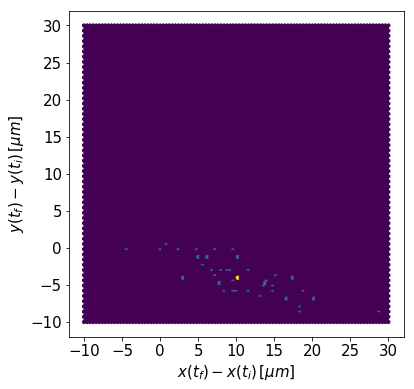

In [75]:
displace_array = getAllDisplace('onion_2')
fig = plt.figure(figsize=(6,6))
plt.hexbin(displace_array[:,0]*1e6, displace_array[:,1]*1e6, extent=(-10, 30, -10, 30))
plt.xlabel('$x(t_f)-x(t_i) \, [\mu m]$', fontsize=15)
plt.ylabel('$y(t_f)-y(t_i) \, [\mu m]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/onion2.pdf', bbox_inches='tight')

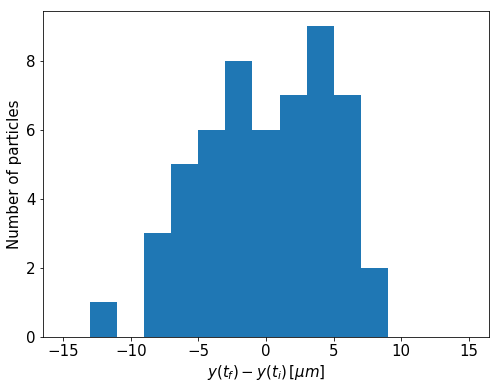

In [66]:
displace_array = getAllDisplace('onion_1')
fig = plt.figure(figsize=(8,6))
plt.hist(displace_array[:,1]*1e6, bins=15, range=(-15,15))
plt.xlabel('$y(t_f)-y(t_i) \, [\mu m]$', fontsize=15)
plt.ylabel('Number of particles', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/y1.pdf', bbox_inches='tight')

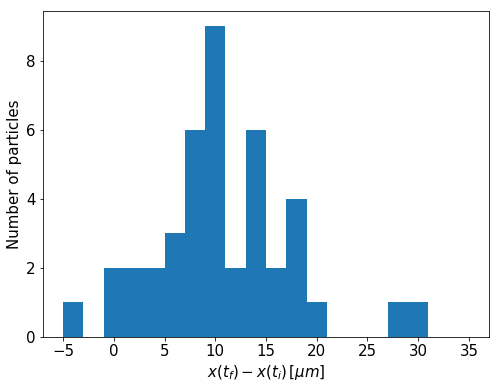

In [69]:
displace_array = getAllDisplace('onion_2')
fig = plt.figure(figsize=(8,6))
plt.hist(displace_array[:,0]*1e6, bins=20, range=(-5, 35))
plt.xlabel('$x(t_f)-x(t_i) \, [\mu m]$', fontsize=15)
plt.ylabel('Number of particles', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/x2.pdf', bbox_inches='tight')

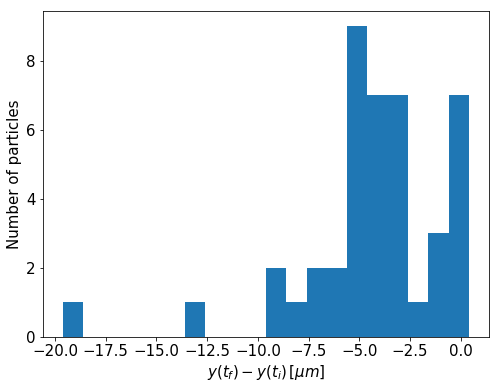

In [71]:
displace_array = getAllDisplace('onion_2')
fig = plt.figure(figsize=(8,6))
plt.hist(displace_array[:,1]*1e6, bins=20)
plt.xlabel('$y(t_f)-y(t_i) \, [\mu m]$', fontsize=15)
plt.ylabel('Number of particles', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/y2.pdf', bbox_inches='tight')

(array([1., 0., 0., 1., 1., 2., 0., 3., 2., 4., 3., 8., 2., 1., 3., 3., 1.,
        1., 3., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([-4.4 , -3.14, -1.88, -0.62,  0.64,  1.9 ,  3.16,  4.42,  5.68,
         6.94,  8.2 ,  9.46, 10.72, 11.98, 13.24, 14.5 , 15.76, 17.02,
        18.28, 19.54, 20.8 , 22.06, 23.32, 24.58, 25.84, 27.1 , 28.36,
        29.62, 30.88, 32.14, 33.4 , 34.66, 35.92, 37.18, 38.44, 39.7 ,
        40.96, 42.22, 43.48, 44.74, 46.  ]),
 <a list of 40 Patch objects>)

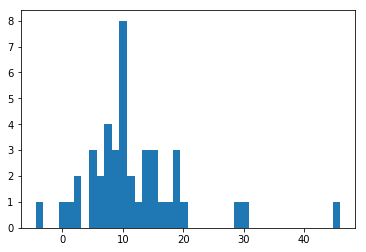

In [58]:
displace_array = getAllDisplace('onion_2')
plt.hist(displace_array[:,0]*1e6, bins=40)

(array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 3., 1., 1., 1., 0.,
        0., 1., 2., 1., 2., 6., 3., 3., 2., 0., 4., 2., 1., 2., 1., 1., 0.,
        0., 1., 0., 0., 0., 1.]),
 array([-1.91869169, -1.66530352, -1.41191535, -1.15852717, -0.905139  ,
        -0.65175083, -0.39836266, -0.14497449,  0.10841368,  0.36180185,
         0.61519003,  0.8685782 ,  1.12196637,  1.37535454,  1.62874271,
         1.88213088,  2.13551906,  2.38890723,  2.6422954 ,  2.89568357,
         3.14907174,  3.40245991,  3.65584809,  3.90923626,  4.16262443,
         4.4160126 ,  4.66940077,  4.92278894,  5.17617711,  5.42956529,
         5.68295346,  5.93634163,  6.1897298 ,  6.44311797,  6.69650614,
         6.94989432,  7.20328249,  7.45667066,  7.71005883,  7.963447  ,
         8.21683517]),
 <a list of 40 Patch objects>)

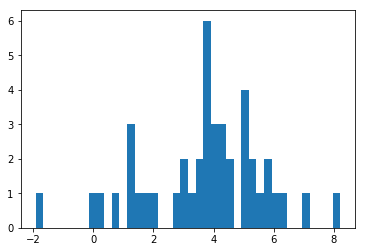

In [54]:
v_array = getMeanv('onion_2')
plt.hist(v_array[:,0]*1e6, bins=40)